<a href="https://colab.research.google.com/github/gonzalezzayra/EDP-II/blob/main/M%C3%A9todo_de_Richardson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Método implícito de Richardson

Escribir el problema a resolver, la ecuación en diferencias del método y explicar de manera concisa.

El problema a resolver es

$$\frac{\partial u }{\partial t}(x,t) - \alpha^2 \frac{\partial^2 u }{\partial x^2}(x,t) = 0 $$

$$0 < x < 1, \quad  0 < t$$

sujeta a las restricciones:

$$u(0,t) = u(1,t) = 0, \quad 0 <t $$

$$u(x,0) = \sin(\pi x), \quad 0 \leq x \leq 1$$

In [1]:
#Importar librerias
import sympy as sp
import numpy as np

#Importar librerias para graficar
import matplotlib.pyplot as plt #Gráficas 2D
from mpl_toolkits.mplot3d import Axes3D  #Gráficas 3D
from matplotlib import cm  #Mapa de color

sympy, para matematicas simbólicas, en el código se utiliza para las matrices, como en:

```
sp.Matrix([])
```


```
A.LUsolve(b)
```

numpy, para matematicas numéricas, en el código se utiliza para:



```
np.pi
```


```
np.linspace()
```

Condición inicial:

$$u(x,0) = \sin(\pi x), \quad 0 \leq x \leq 1$$

In [2]:
#Defininr la condición inicial
def f(x):
    return np.sin(np.pi*x)

Definir matriz A, en este caso la matriz es de los coeficientes de $u_{ij},u_{i+1,j}, u_{i-1,j}, u_{i,j-1} $ que es una matriz **tridiagonal**

Al sustituir en la fórmula:

$$(1 + 2λ) u_{ij} - λ u_{i+1, j} - λ u_{i-1,j} = u_{i,j-1}$$

con $λ$:

$$λ = \frac{\alpha^2 k}{h^2} $$

los valores de $h = 0.1$, $k = 0.01$ y $\alpha = 1$

$$λ = \frac{(1)^2 \cdot (0.1)}{(0.01)^2} = 1 ⇒ \boxed{ λ = 1}$$

In [11]:
A = sp.Matrix([[3,-1, 0, 0, 0, 0, 0, 0, 0],
              [-1, 3,-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 3,-1, 0, 0, 0, 0, 0],
              [0, 0, -1, 3,-1, 0, 0, 0, 0],
              [0, 0, 0, -1, 3,-1, 0, 0, 0],
              [0, 0, 0, 0, -1, 3,-1, 0, 0],
              [0, 0, 0, 0, 0, -1, 3,-1, 0],
              [0, 0, 0, 0, 0, 0, -1, 3,-1],
              [0, 0, 0, 0, 0, 0, 0, -1, 3,]])

**Ejercicio 1**: Codificar la matriz A de manera más simple.

**Para poner el número de intervalos y con el valor de lambda**

In [12]:
n = 9 #números de puntos
lamb = 1 #valor de lambda

Am_2 = np.diag([1 + 2*lamb] * n) + \
    np.diag([-lamb] * (n-1), 1) + \
    np.diag([-lamb] * (n-1), -1)

Am_2 #Imprimir la matriz

array([[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
       [-1,  3, -1,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  3, -1,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  3, -1,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  3, -1,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  3, -1,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  3, -1,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  3, -1],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

**Otra forma de hacerlo:**

In [13]:
def matriz_A(h, a, k):
    n = int(1 / h) - 1 #Para el número de puntos
    lam = (a**2 * k) / (h**2) #Coeficiente lambda

    Am_1 = np.zeros((n, n)) #Se inicia con la matriz llena de ceros

    #Ciclo for para rellenar las diagonales dependiendo de subindice
    for i in range(n):
        for j in range(n):
            if i == j: #Subindice ij
                Am_1[i, j] = 1 + 2 * lamb #(1 + 2*lambda)u_ij
            elif i - 1 == j: #Subindice i-1,j
                Am_1[i, j] = -lamb #-lambda u_{i-1,j}
            elif i + 1 == j: #Subindice i,j-1
                Am_1[i, j] = -lamb #-lambda u_{i,j-1}

    return Am_1, lamb, n #Regresa el valor de A, lambda y n

Am_1, lamb, n = matriz_A(h=0.1, a=1, k=0.01)

print("Valor de lambda: ", lamb)

Am = sp.Matrix(Am_1) #Para no tener problemas después con b
Am

Valor de lambda:  1


Matrix([
[ 3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[-1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0]])

In [14]:
b = sp.Matrix([f(0.1), f(0.2), f(0.3), f(0.4), f(0.5), f(0.6), f(0.7), f(0.8), f(0.9)])
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

**Ejercicio 2**: Definir las entradas de b de manera más simple (quizás con un bucle).

In [15]:
h = 0.1
bm = sp.Matrix([f(i*h) for i in range(1, n+1)]) #Generar con un ciclo for los puntos
bm

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [16]:
A

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

In [17]:
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [18]:
A.LUsolve(b)

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

In [19]:
Am.LUsolve(bm)

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

Al comparar vemos, que quedaron de la misma forma

Esta función es solo de prueba. La puede omitir para optimizar la presentación.

In [20]:
def richardson_1(A, b, j):
    b_1 = b
    for i in range(j+1):
        sol = A.LUsolve(b_1)
        b_1 = sol
        _ = None #Para que no imprima resultados parciales
    return b_1

In [21]:
richardson_1(A, b, 3)

Matrix([
[0.212692337894623],
[0.404564867841463],
[  0.5568357697548],
[0.654599706821597],
[0.688286863720354],
[0.654599706821597],
[  0.5568357697548],
[0.404564867841463],
[0.212692337894623]])

In [23]:
def richardson(A, b, j):
    S = []
    b_1 = b.copy()

    for i in range(j+1):
        S.append(np.array(b_1, dtype=float).reshape(-1))  # vector fila
        sol = A.LUsolve(b_1)
        b_1 = sol

    return np.array(S)   # matriz resultado

**Ejercicio 4**: Graficar para un valor particular de t > 0 y comparar contra la gráfica de la solución exacta (quizás necesite calcularla).  

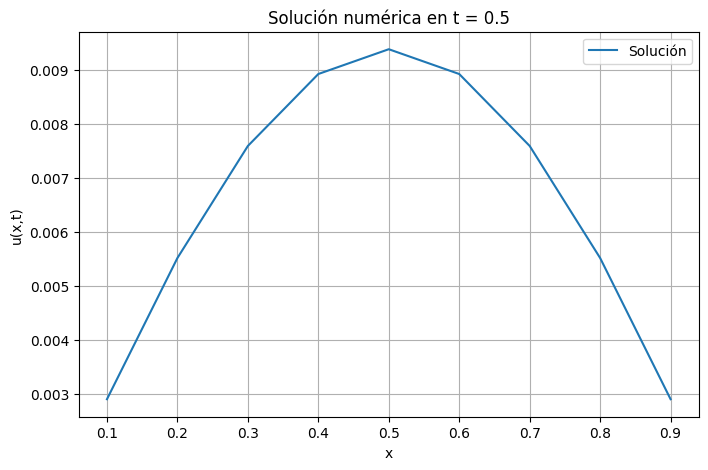

In [26]:
tp = 0.5 #Valor particular de t
k = 0.01 #Valor de k
Nt = int(tp / k) #Para el obtener el numero de puntos

u_t = b.copy() #Copiar el valor de b
for _ in range(Nt):
    u_t = A.LUsolve(u_t)

u_num_lista = [u_t[i] for i in range(n)]
u_num = np.array(u_num_lista)

x_lista = [i * h for i in range(1, n + 1)]
x = np.array(x_lista)

#Gráfica de la solución particular
plt.figure(figsize=(8,5))
plt.plot(x, u_num, label='Solución')
plt.title(f'Solución particular en t = {tp}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.grid(True)
plt.legend()
plt.show()

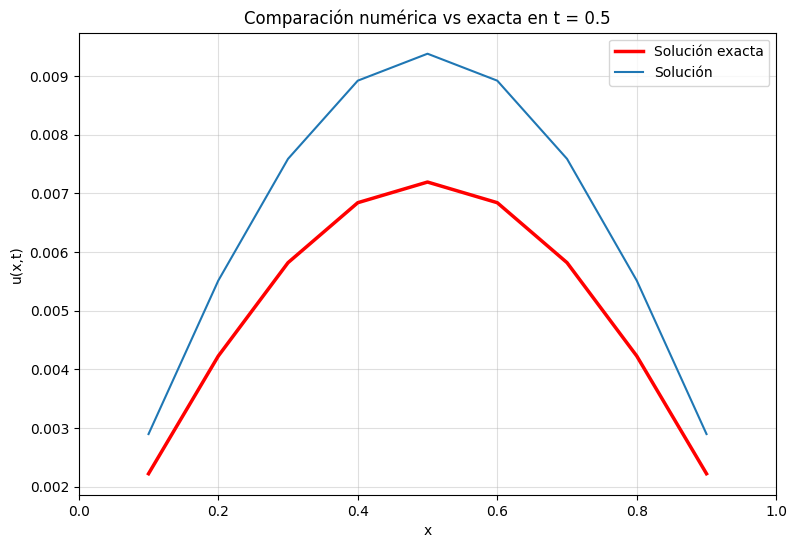

In [48]:
#Con el valor particular de t
tp = 0.5
x = np.array([i * h for i in range(1, n + 1)]) #Generamos los valores de x
sol_exacta = np.exp(-np.pi**2 * tp) * np.sin(np.pi * x) #Definir la sol. exacta


#Gráfica
plt.figure(figsize=(9,6))
plt.plot(x, sol_exacta, 'r-', linewidth=2.5, label='Solución exacta')
plt.plot(x, u_num, label='Solución')
plt.title(f'Comparación numérica vs exacta en t = {tp}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.grid(True, alpha=0.4)
plt.legend()
plt.xlim(0,1)
plt.show()

**Ejercicio 5**:¿Es necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?

No, no es necesario. Ya que si se puede simplificar el sistema, como se ha hecho antes hacer una factorización LU y el sistema sería más sencillo de trabajar con el.

In [40]:
j = 20 # Número de pasos en el tiempo

In [45]:
U=richardson(A, b, j)

In [47]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
print(x)
y = np.linspace(0, 0.6, j+1) #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y)

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


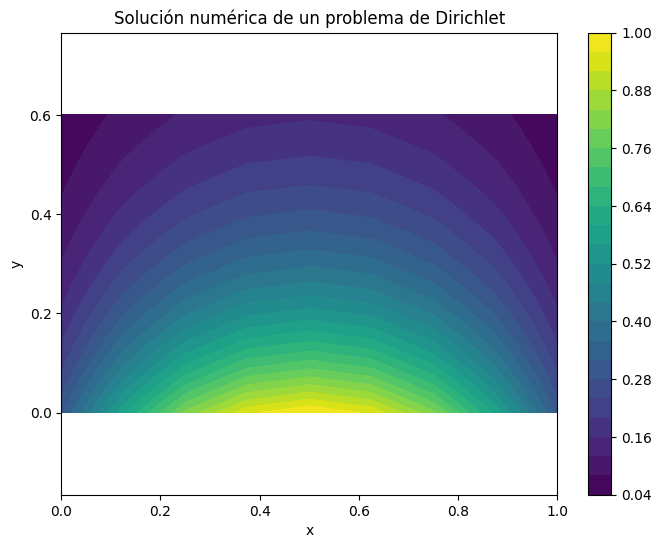

In [43]:
#Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

**Explicar la gráfica**

El eje de las 'x' es la barra, mientra el eje de las 'y' es el tiempo. Como es un mapa de color, el color representa la temperatura, los colores en los tonos azules representan el frío en la barra, mientras se van tornando de color a verde y después a amarillo, es por que se esta poniendo caliente en ese momento del tiempo.

Como se puede ver en la gráfica en la parte del centro se nota que la barra aumenta la temperartura, mientras que en los extremos estan frios, esto representa la temperatura de la barra.

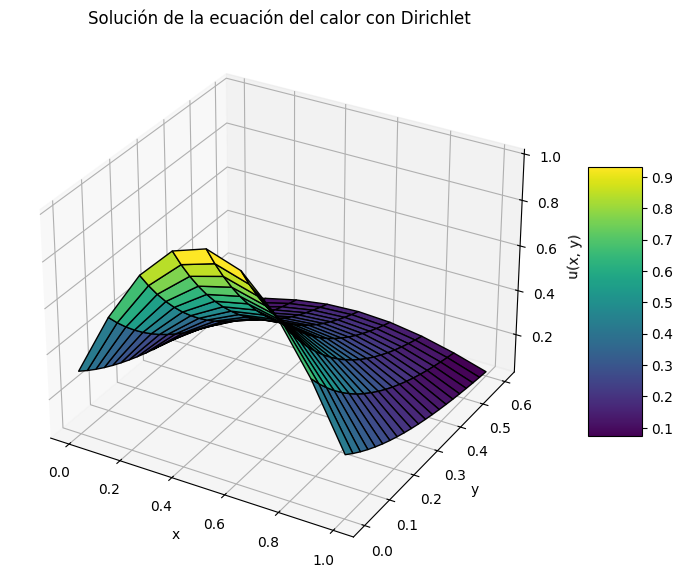

In [44]:
#%matplotlib notebook
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

**Explicar la gráfica**

Retomando, el eje 'x' representa es la barra, el eje 'y' representa el tiempo y el eje 'z' representa la temperatura, en la gráfica anterior era representada por el color.

Se puede ver que la gráfica en el valor de $y = 0$ esta 'alzada' y con los colores ponemos ver que la temperatura es mayor a como vemos en $y = 0.6$ que es un tono violeta o azul.

Vemos que la gráfica se va aplanando y aparte la temperatura va disminuyendo, entonces la barra se va enfriando. De igual forma ponemos ver como se confirma que lo extremos estan frios, ya que se encuentra en tonos azules, como se habia visto en el mapa de calor.

**Ejercicio 6**: Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?

Puede que uno de los errores en la precisión de estas gráficas sea ocasionado por esto:


```
x = np.linspace(0, 1, 9) #Número de nodos internos en X
print(x)

#Esto nos da al imprimirlo

[ 0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.  ]
```

Dado que se había tomado en cuenta los puntos de

```
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
```

Entonces los puntos de x no coinciden cono los otros, por lo que aquí está el error.

#### Rúbrica:


|   Criterio | Calificación|
|:----------:|:-----------:|
| Presentación    |  10 puntos   |  
| Comentarios  |  10 puntos   |
| Documentación  |  10 puntos   |
| Funcionamiento  |  10 puntos   |
| Corrección  |  10 puntos   |
| Ejercicios  |  40 puntos   |
| Autonomía  |  10 puntos   |



**Comentarios**: Explicación breve y concisa sobre los bloques de códigos, funciones, etc.<br>
**Documentación**: Anotaciones sobre la sintaxis de Python: verisones, uso de librerías, estructuras, funciones búcles, etc. Solo lo que no sea obvio. <br>
**Presentación**: Uso profesional de texto, imágenes, tablas, ecuaciones para completar la Notebook (Que esta pueda usarse en una presentación).<br>
**Ejercicios**: Presenta la solución completa correcta de los ejercicios propuestos.<br>
**Funcionamiento**: El código se puede ejecutar sin errores.<br>
**Corrección**: El código devuelve las funciones correctas.<br>
**Autónomia**: Uso razonado e inteligente de la IA. Por ética, su uso causará la mínima calificación global.<br>



Material extra. Si lo desea, incorpore el material que pueda aprovechar en el lugar conveniente.

In [75]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8,5))
line, = ax.plot(x, U[0], lw=2)
ax.set_ylim(np.min(U), np.max(U))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U[k])
    ax.set_title(f'tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval=200)
plt.show()

<IPython.core.display.Javascript object>

In [76]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis)
plt.show()

<IPython.core.display.Javascript object>

In [77]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

def update(k):
    ax.clear()
    ax.plot_surface(X, Y, U, cmap=cm.viridis)   # superficie completa
    ax.plot(x, y[k]*np.ones_like(x), U[k], color='r', lw=3)  # curva que se mueve
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    ax.set_title(f"Iteración / Tiempo: {k}")
    return []

anim = FuncAnimation(fig, update, frames=len(y), interval=200)
plt.show()


<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [78]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np

# U ya viene de:
# U = richardson(A, b, j)
# y y x ya están definidos

fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot(x, U[0], lw=2, color='blue')

ax.set_ylim(np.min(U), np.max(U))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U[k])
    ax.set_title(f'Tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval=200)

# Guardar como GIF
writer = PillowWriter(fps=6)
anim.save("animacion.gif", writer=writer)

print("Listo: archivo guardado como animacion.gif")


<IPython.core.display.Javascript object>

Listo: archivo guardado como animacion.gif
